# Simple Analysis of Crime Data
---
Means, Modes, Frequencies, etc.

** Author(s):** Eoin Doherty

In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
# Add other paths here
crimeData = '../Data/Crime_Data_Clean_Consolidated.csv'
weatherData = '../Data/Weather_Final.csv'
unemploymentData = '../Data/UnemploymentRate.csv'

premiseData = '../Data/PremiseDescriptions.csv'
statusData = '../Data/StatusCodeDescriptions.csv'
areaData = '../Data/AreaDescriptions.csv'
weaponData = '../Data/WeaponDescriptions.csv'
crimeCodeData = '../Data/CrimeCodeDescriptions.csv'

Load every dataset.

Each dataframe is in a separate cell if you need to reload it later. 

In [3]:
dfCrime = pd.read_csv(crimeData).drop(["Unnamed: 0"], axis=1)

In [4]:
dfWeath = pd.read_csv(weatherData)

In [5]:
dfUnemploy = pd.read_csv(unemploymentData)

In [6]:
dfPremise = pd.read_csv(premiseData)
dfStatus = pd.read_csv(statusData)
dfArea = pd.read_csv(areaData)
dfWeapon = pd.read_csv(weaponData)
dfCC = pd.read_csv(crimeCodeData)

In [13]:
dfCrime["DateTimeOccurred"] = dfCrime.apply(lambda row: datetime.strptime(row["DateOccurred"] + ' ' + row["TimeOccurred"], "%Y-%m-%d %H:%M:%S"), axis=1)

In [15]:
dfCrime.head()

,ID,DateReported,DateOccurred,TimeOccurred,AreaID,ReportingDistrict,CrimeCode,MOCodes,VictimAge,VictimSex,...,DailyAverageRelativeHumidity,DailySunrise,DailySunset,DailyPrecip,DailySnowfall,DailySnowDepth,DailyAverageWindSpeed,DailyAverageHeatIndex,night,DateTimeOccurred
0,180204779,2018-01-17,2010-01-01,00:01:00,2,245,813,0510 0522 0558 1258 0602,-1,F,...,44,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00
1,172020383,2017-11-12,2010-01-01,00:01:00,20,2074,354,0100,51,F,...,44,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00
2,171913109,2017-06-13,2010-01-01,00:01:00,19,1994,354,0377 1822,42,F,...,44,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00
3,172013071,2017-06-28,2010-01-01,00:01:00,20,2025,820,1257 0550,-1,F,...,44,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00
4,171809308,2017-04-05,2010-01-01,00:01:00,18,1891,760,0515 0913 1817 1820 0516 0500 0506,18,F,...,44,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00


In [16]:
list(dfCrime)

['ID',
 'DateReported',
 'DateOccurred',
 'TimeOccurred',
 'AreaID',
 'ReportingDistrict',
 'CrimeCode',
 'MOCodes',
 'VictimAge',
 'VictimSex',
 'VictimDescent',
 'PremiseCode',
 'WeaponUsedCode',
 'StatusCode',
 'CrimeCode1',
 'CrimeCode2',
 'CrimeCode3',
 'CrimeCode4',
 'Address',
 'CrossStreet',
 'Location',
 'UnemploymentRate',
 'WeatherDate',
 'ReportType',
 'HourlyVisibility',
 'HourlyDryBulbTempF',
 'HourlyRelativeHumidity',
 'HourlyPrecip',
 'HourlyHeatIndex',
 'DailyMaximumDryBulbTemp',
 'DailyMinimumDryBulbTemp',
 'DailyAverageDryBulbTemp',
 'DailyAverageRelativeHumidity',
 'DailySunrise',
 'DailySunset',
 'DailyPrecip',
 'DailySnowfall',
 'DailySnowDepth',
 'DailyAverageWindSpeed',
 'DailyAverageHeatIndex',
 'night',
 'DateTimeOccurred']

### Averages and Stuff
---
Some averages to establish a sort of baseline.

In [17]:
trueHI = dfCrime.loc[dfCrime["DailyAverageHeatIndex"] < 999]["DailyAverageHeatIndex"]

realTrueHI = dfWeath.loc[dfWeath["DailyAverageHeatIndex"] < 999]["DailyAverageHeatIndex"];

In [18]:
meanVictimAge = np.mean(dfCrime["VictimAge"])
meanUnemploymentRate = np.mean(dfCrime["UnemploymentRate"])
meanHI = np.mean(trueHI)

print("Average victim age:", meanVictimAge)
print("\"Average\" unemployment rate:", meanUnemploymentRate)
print("\"Average\" Heat Index:", meanHI)

Average victim age: 32.97893772232137
"Average" unemployment rate: 8.649744172380776
"Average" Heat Index: 77.65726601980991


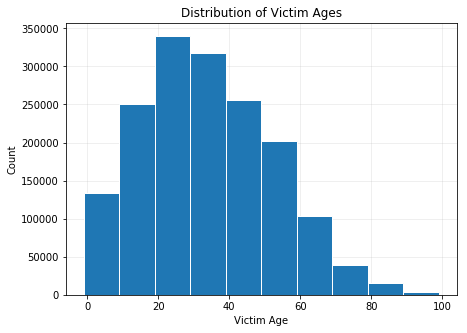

In [19]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(dfCrime["VictimAge"], edgecolor="white")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_title("Distribution of Victim Ages")
ax.set_xlabel("Victim Age")
ax.set_ylabel("Count")
plt.show()

Now to compare them to the means of all of the data

In [20]:
realMeanUR = np.mean(dfUnemploy["UnemploymentRate"])
realMeanHI = np.mean(realTrueHI)

print("Average unemployment rate:", realMeanUR)
print("Average Heat Index:", realMeanHI)

Average unemployment rate: 7.652976190476189
Average Heat Index: 77.30146660262312


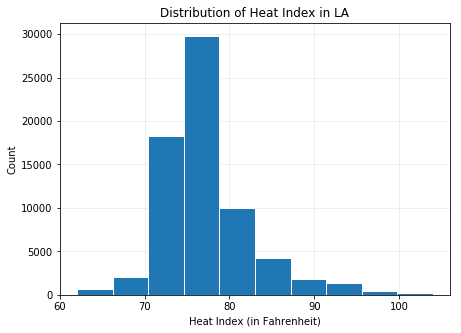

In [21]:
fig, ax = plt.subplots(figsize=(7,5))
ax.hist(np.array(realTrueHI), edgecolor="white")
ax.set_title("Distribution of Heat Index in LA")
ax.grid(alpha=0.25)
ax.set_axisbelow(True)
ax.set_xlabel("Heat Index (in Fahrenheit)")
ax.set_ylabel("Count")
plt.show()

The averages taken from the crime data are skewed since not every day is represented equally.

The average unemployment rate is about 1 percent higher in the crime data than the average from the unemployment data. The heat index from the crime data and the weather data is about the same. This suggests that crime increases with unemployment rate, and weather does not have mush of an effect on crime.

## Frequencies
---
The frequencies of some nominal data from the crime dataset (using percent for better interpretation at a glance).

In [22]:
crimeLen = len(dfCrime)
crimeLen

1660884

Some information about the area and victims

In [23]:
areaIDFreq = dfCrime["AreaID"].value_counts()/crimeLen * 100

In [24]:
premiseFreq = dfCrime["PremiseCode"].value_counts()/crimeLen * 100

In [25]:
victimDescFreq = dfCrime["VictimDescent"].value_counts()/crimeLen * 100
victimSexFreq = dfCrime["VictimSex"].value_counts()/crimeLen * 100

In [26]:
# Crime code counts
crimeCodeCounts = dfCrime["CrimeCode"].value_counts()
crimeCode1Counts = dfCrime["CrimeCode1"].value_counts()
crimeCode2Counts = dfCrime["CrimeCode2"].value_counts()
crimeCode3Counts = dfCrime["CrimeCode3"].value_counts()
crimeCode4Counts = dfCrime["CrimeCode4"].value_counts()

crimeCodeFreqs = pd.concat([dfCrime["CrimeCode"], dfCrime["CrimeCode1"], dfCrime["CrimeCode2"], dfCrime["CrimeCode3"], dfCrime["CrimeCode4"]]).value_counts()/(crimeLen*5) * 100


In [27]:
# Status code counts
statusCodeFreq = dfCrime["StatusCode"].value_counts()/crimeLen * 100

In [28]:
# Weapon code counts
weaponCodeFreq = dfCrime["WeaponUsedCode"].value_counts()/crimeLen * 100

In [29]:
isNightFreq = dfCrime["night"].value_counts()/crimeLen * 100

### Translating into English

Translate the areaIDs

In [30]:
dfArea.head()

,AreaID,AreaName
0,10,West Valley
1,14,Pacific
2,15,N Hollywood
3,18,Southeast
4,5,Harbor


In [31]:
d = dict(areaIDFreq)
readableAreaID = {}

for k in d.keys():
    name = list(dfArea.loc[dfArea["AreaID"] == k]["AreaName"])[0]
    readableAreaID[name] = d[k]
pd.Series(readableAreaID).sort_values(ascending = False)

77th Street    6.967615
Southwest      6.452347
N Hollywood    5.439272
Pacific        5.286643
Southeast      5.265449
Mission        5.044302
Northeast      4.816110
Van Nuys       4.772880
Newton         4.701292
Devonshire     4.667514
Topanga        4.635303
Hollywood      4.582921
Harbor         4.451846
Olympic        4.446247
Central        4.283863
West Valley    4.272845
Rampart        4.223414
West LA        4.179040
Wilshire       4.034237
Foothill       3.834886
Hollenbeck     3.641976
dtype: float64

Translate the premise codes

In [32]:
d = dict(premiseFreq)
readablePremiseFreq = {}

for k in d.keys():
    name = list(dfPremise.loc[dfPremise["PremiseCode"] == k]["PremiseDescription"])[0]
    readablePremiseFreq[name] = d[k]
pd.Series(readablePremiseFreq).sort_values(ascending = False)

STREET                                          22.273922
SINGLE FAMILY DWELLING                          20.633349
MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)    12.869291
PARKING LOT                                      7.117053
SIDEWALK                                         4.992341
OTHER BUSINESS                                   4.480325
VEHICLE, PASSENGER/TRUCK                         3.808695
DRIVEWAY                                         2.050294
GARAGE/CARPORT                                   1.785555
DEPARTMENT STORE                                 1.400820
RESTAURANT/FAST FOOD                             1.339287
MARKET                                           1.034690
OTHER STORE                                      0.793553
PARKING UNDERGROUND/BUILDING                     0.699146
YARD (RESIDENTIAL/BUSINESS)                      0.699146
PARK/PLAYGROUND                                  0.685779
OTHER PREMISE                                    0.668560
HIGH SCHOOL   

Translate the crime codes

In [33]:
d = dict(crimeCodeFreqs)
readableCC = {}
for k in d.keys():
    try:
        name = list(dfCC.loc[dfCC["CrimeCode"] == k]["CrimeCodeDescription"])[0]
    except IndexError:
        if k == -1:
            name = "UNDEFINED"
        else:
            name = str(k)
    readableCC[name] = d[k]
crimes = pd.Series(readableCC).sort_values(ascending = False)

Translate the status codes

In [34]:
d = dict(statusCodeFreq)
readableStatusCodeFreq = {}

for k in d.keys():
    name = list(dfStatus.loc[dfStatus["StatusCode"] == k]["StatusDescription"])[0]
    readableStatusCodeFreq[name] = d[k]
pd.Series(readableStatusCodeFreq).sort_values(ascending = False)

Invest Cont     77.319488
Adult Other     11.359011
Adult Arrest    10.282055
Juv Arrest       0.790182
Juv Other        0.247459
UNK              0.000060
dtype: float64

Translate the weapon codes

In [35]:
dfWeapon.head()

,WeaponUsedCode,WeaponDescription
0,-1,NaN
1,400,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)"
2,102,HAND GUN
3,106,UNKNOWN FIREARM
4,500,UNKNOWN WEAPON/OTHER WEAPON


In [36]:
d = dict(weaponCodeFreq)
readableWeaponCodeFreq = {}

for k in d.keys():
    name = list(dfWeapon.loc[dfWeapon["WeaponUsedCode"] == k]["WeaponDescription"])[0]
    readableWeaponCodeFreq[name] = d[k]
pd.Series(readableWeaponCodeFreq).sort_values(ascending = False)

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    20.148848
VERBAL THREAT                                      2.750222
UNKNOWN WEAPON/OTHER WEAPON                        2.584226
HAND GUN                                           1.595957
SEMI-AUTOMATIC PISTOL                              0.630869
KNIFE WITH BLADE 6INCHES OR LESS                   0.592516
OTHER KNIFE                                        0.439766
UNKNOWN FIREARM                                    0.378413
VEHICLE                                            0.337230
REVOLVER                                           0.286052
BOTTLE                                             0.239330
BLUNT INSTRUMENT                                   0.210430
ROCK/THROWN OBJECT                                 0.205674
STICK                                              0.204650
CLUB/BAT                                           0.198629
FOLDING KNIFE                                      0.196161
SIMULATED GUN                           

The first of each month have the highest crime rates.

In [37]:
dateCounts = dfCrime["DateOccurred"].value_counts()
dateCounts/crimeLen * 100

2010-01-01    0.129690
2011-01-01    0.124512
2012-01-01    0.099826
2013-01-01    0.089109
2014-01-01    0.081282
2015-01-01    0.077850
2016-01-01    0.070083
2012-06-01    0.060149
2017-01-01    0.057740
2010-06-01    0.056837
2011-04-01    0.056536
2010-10-01    0.056175
2015-11-01    0.054188
2011-06-01    0.053285
2013-11-01    0.052984
2015-08-01    0.052322
2015-06-01    0.052261
2012-10-01    0.052201
2011-08-01    0.052201
2017-09-01    0.051900
2016-08-01    0.051719
2013-03-01    0.051719
2016-11-01    0.051539
2016-04-01    0.051479
2016-09-01    0.051418
2016-02-01    0.051117
2012-08-01    0.051057
2011-10-01    0.050877
2015-05-01    0.050877
2012-05-01    0.050816
                ...   
2012-03-18    0.026432
2013-06-11    0.026371
2013-03-03    0.026371
2013-02-10    0.026311
2011-12-25    0.026191
2011-02-21    0.026191
2013-12-19    0.026191
2013-12-07    0.026191
2012-12-26    0.026131
2011-01-09    0.026070
2013-03-31    0.026010
2015-11-26    0.026010
2013-11-28 

### Correlations
---

In [38]:
dateD = dict(dateCounts)
dfCrime["TotalDailyCrime"] = dfCrime.apply(lambda row: dateD[row["DateOccurred"]], axis=1)
dfCrime.head()

,ID,DateReported,DateOccurred,TimeOccurred,AreaID,ReportingDistrict,CrimeCode,MOCodes,VictimAge,VictimSex,...,DailySunrise,DailySunset,DailyPrecip,DailySnowfall,DailySnowDepth,DailyAverageWindSpeed,DailyAverageHeatIndex,night,DateTimeOccurred,TotalDailyCrime
0,180204779,2018-01-17,2010-01-01,00:01:00,2,245,813,0510 0522 0558 1258 0602,-1,F,...,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00,2154
1,172020383,2017-11-12,2010-01-01,00:01:00,20,2074,354,0100,51,F,...,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00,2154
2,171913109,2017-06-13,2010-01-01,00:01:00,19,1994,354,0377 1822,42,F,...,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00,2154
3,172013071,2017-06-28,2010-01-01,00:01:00,20,2025,820,1257 0550,-1,F,...,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00,2154
4,171809308,2017-04-05,2010-01-01,00:01:00,18,1891,760,0515 0913 1817 1820 0516 0500 0506,18,F,...,06:59:00,16:56:00,0.0,0.0,0.0,0.9,82.6,1,2010-01-01 00:01:00,2154


In [40]:
dfCrime["TotalDailyCrime"].corr(dfCrime["UnemploymentRate"])

-0.14101185221502088

Slight negative correlation of -0.141 between the unemployment rate and number of crimes committed for a given day.

In [41]:
dfCrime["TotalDailyCrime"].corr(dfCrime["DailyAverageHeatIndex"])

-0.013343742389180851

Slight negative correlation of -0.013 between heat index and the total number of crimes in a day.

In [42]:
dfCrime["TotalDailyCrime"].corr(dfCrime["DailyAverageRelativeHumidity"])

0.0021247574770198755

Very slight positive correlation of 0.002 between crime and humidity. This probably isn't very useful.

In [43]:
dfCrime["TotalDailyCrime"].corr(dfCrime["DailyPrecip"])

-0.035095496654067415

Slight negative correlation of -0.035 between precipitation and crime.

Correlations with unemployment rate may be easier to find if we look at monthly crime. 

In [73]:
monthlyCrimeCounts = {}
for i, row in dfCrime.iterrows():
    date = row["DateTimeOccurred"]
    try:
        monthlyCrimeCounts[(date.month, date.year)][0] += 1
    except KeyError:
        monthlyCrimeCounts[(date.month, date.year)] = [1, row["UnemploymentRate"]]

In [74]:
combo = list(zip(*list(monthlyCrimeCounts.values())))
crimes = pd.Series(combo[0])
rates = pd.Series(combo[1])

rates.corr(crimes)

-0.52870125240059618

There is a fairly significant negative correlation of -0.529 between crime and unemployment rate.